##### Sumber Data : https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

Import library yang akan digunakan, yaitu NumPy untuk memproses operasi matematika yang akan digunakan pada dataframe dan Pandas untuk membangun dataframe dari file, dalam hal ini file .csv. Files digunakan untuk mengupload kaggle.json untuk menghubungkan Google Colab dengan Kaggle.

In [ ]:
import numpy as np
import pandas as pd

from google.colab import files

# Kaggle Setup

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
#unggah file json yang diunduh dari akun kaggle
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


Buat direktori Kaggle dan pindahkan file yang diunggah ke folder baru. Kemudian berikan izin baca agar bisa diakses di Google Colab.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 /root/.kaggle/kaggle.json

## Mengunduh dan Menyiapkan Dataset

<img width="726" alt="image" src="https://user-images.githubusercontent.com/87566521/180254332-31f36886-46d7-4abb-94d7-a6fc1913bb65.png">

####**Informasi Dataset :**

Jenis | Informasi
--- | ---
Sumber | [Kaggle Dataset : Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)
Lisensi | CC0: Public Domain
Kategori | Literature
Rating Pengunaan | 10.0 (Bronze)
Jenis dan Ukuran Berkas | CSV (106.94 MiB)

In [ ]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

book-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q /content/book-recommendation-dataset.zip -d .

replace ./Books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./Users.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Univariate Exploratory Data Analysis

Pada tahap ini, eksplorasi data dilakukan untuk memahami variabel-variabel dalam data dan korelasi antarvariabel. Eksplorasi dilakukan terhadap tiap 
file pada dataset yaitu Books.csv, Ratings.csv, dan Users.csv.

In [ ]:
# Memuat data pada sebuah dataframe menggunakan Pandas

Books = pd.read_csv('/content/Books.csv')
Ratings = pd.read_csv('/content/Ratings.csv')
Users = pd.read_csv('/content/Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Books.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [ ]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
Books = Books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

In [ ]:
Books.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


In [ ]:
print('Bentuk data (baris, kolom):'+ str(Books.shape))
print('Bentuk data (baris, kolom):'+ str(Ratings.shape))
print('Bentuk data (baris, kolom):'+ str(Users.shape))

Bentuk data (baris, kolom):(271360, 5)
Bentuk data (baris, kolom):(1149780, 3)
Bentuk data (baris, kolom):(278858, 3)


### Variabel Books

In [ ]:
# Memuat informasi dataframe
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [ ]:
Books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [ ]:
# Melihat jumlah data kosong pada setiap kolom
Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [ ]:
#Drop data yang kosong pada setiap kolom
Books = Books.dropna(axis=0)
Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
print('Total jumlah ISBN:', len(Books['ISBN'].unique()))
print('Total jumlah Book-Title :', len(Books['Book-Title'].unique()))
print('Total jumlah Publisher :', len(Books['Publisher'].unique()))

Total jumlah ISBN: 271357
Total jumlah Book-Title : 242133
Total jumlah Publisher : 16806


### Variabel Ratings

In [ ]:
Ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
Ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Berdasarkan output di atas, dapat disimpulkan bahwa rating maksimum adalah 10 dan rating minimum adalah 0. Artinya, ada rating implisit yang ditunjukkan dengan nilai 0 yang selanjutnya akan kita anggap sebagai outlier karena skala rating yang sebenarnya berkisar antara 1 hingga 10. 

In [ ]:
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
print('Total Jumlah User :', len(Ratings['User-ID'].unique()))
print('Total Jumlah Rating :', len(Ratings['Book-Rating'].unique()))

Total Jumlah User : 105283
Total Jumlah Rating : 11


## Variabel Users

In [ ]:
Users.head(6)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0


In [ ]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
Users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
# Drop data yang kosong pada setiap kolom
Users = Users.dropna(axis=0)
Users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168096 entries, 1 to 278854
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   168096 non-null  int64  
 1   Location  168096 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ MB


In [ ]:
Users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [ ]:
print('Total Jumlah User :', len(Users['User-ID'].unique()))
print('Total Jumlah Lokasi :', len(Users['Location'].unique()))
print('Total Jumlah Umur:', len(Users['Age'].unique()))

Total Jumlah User : 168096
Total Jumlah Lokasi : 41253
Total Jumlah Umur: 165


# Data Preprocessing

Pada proses ini dilakukan penggabungan data pada variabel Books dan variabel Ratings dengan merge pada kondisi left yaitu menjaga semua baris dari dataframe pertama dan menambahkan kolom apa pun yang cocok berdasarkan kolom ISBN di dataframe kedua.

In [ ]:
book_rating = pd.merge(Books, Ratings, on='ISBN', how='left')

In [ ]:
book_rating.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0


In [ ]:
book_rating.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher                 0
User-ID                1209
Book-Rating            1209
dtype: int64

Pada proses ini dilakukan penggabungan data pada variabel book_rating dan variabel Users dengan merge pada kondisi left yaitu menjaga semua baris dari dataframe pertama dan menambahkan kolom apa pun yang cocok berdasarkan kolom User-ID di dataframe kedua.

In [ ]:
books = pd.merge(book_rating, Users, on='User-ID', how='left')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,NaN,NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,NaN,NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1032337,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463.0,7.0,"providence, rhode island, usa",26.0
1032338,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,276579.0,4.0,"orem, utah, usa",12.0
1032339,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,276680.0,0.0,"hopewell junction, new york, usa",55.0
1032340,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,276680.0,0.0,"hopewell junction, new york, usa",55.0


In [ ]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,NaN,NaN


In [ ]:
books = books[['User-ID','Age','Location','ISBN',	'Book-Title',	'Book-Author',	'Year-Of-Publication',	'Publisher',	'Book-Rating']]
books.head()

,User-ID,Age,Location,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating
0,2.0,18.0,"stockton, california, usa",0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0.0
1,8.0,NaN,NaN,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5.0
2,11400.0,49.0,"ottawa, ontario, canada",0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.0
3,11676.0,NaN,NaN,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0
4,41385.0,NaN,NaN,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.0


In [ ]:
books.shape

(1032342, 9)

# Data Preparation

Pada tahap ini dilakukan persiapan data dan beberapa teknik seperti mengatasi missing value dan menghapus NULL data.

In [ ]:
books.isnull().sum()

User-ID                  1209
Age                    279044
Location               279044
ISBN                        0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Book-Rating              1209
dtype: int64

In [ ]:
books = books.dropna()

In [ ]:
books.isnull().sum()

User-ID                0
Age                    0
Location               0
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Book-Rating            0
dtype: int64

In [ ]:
books.shape

(753298, 9)

In [ ]:
books.columns

Index(['User-ID', 'Age', 'Location', 'ISBN', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Book-Rating'],
      dtype='object')

Nama kolom di-rename sesuai keinginan, untuk lebih merepresentasikan kolom atau untuk memudahkan penulisan nama kolom pada tahapan selanjutnya.

In [ ]:
books.rename(columns={'User-ID':'userID','Book-Title':'Title', 'Book-Author':'Author','Year-Of-Publication':'PublicationYear','Book-Rating':'Rating'}, inplace=True)
books

,userID,Age,Location,ISBN,Title,Author,PublicationYear,Publisher,Rating
0,2.0,18.0,"stockton, california, usa",0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0.0
2,11400.0,49.0,"ottawa, ontario, canada",0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.0
5,67544.0,30.0,"toronto, ontario, canada",0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0
6,85526.0,36.0,"victoria, british columbia, canada",0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.0
7,96054.0,29.0,"ottawa, ontario, canada",0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.0
...,...,...,...,...,...,...,...,...,...
1032337,276463.0,26.0,"providence, rhode island, usa",0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),7.0
1032338,276579.0,12.0,"orem, utah, usa",0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,4.0
1032339,276680.0,55.0,"hopewell junction, new york, usa",006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,0.0
1032340,276680.0,55.0,"hopewell junction, new york, usa",0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,0.0


Pada data preparation, akan diperiksa rating dengan nilai < 3 yang kemudian akan dihapus untuk kepentingan distribusi rating agar lebih merata.

In [ ]:
#  cek data yg memiliki rating <3
print('Jumlah rating < 3 :', books['Rating'].lt(3).sum())
books.shape

Jumlah rating < 3 : 486128


(753298, 9)

In [ ]:
# menghilangkan data yang memiliki rating <3
books = books[books['Rating']>=3]
print('Jumlah total rating < 3 :', books['Rating'].lt(3).sum())
books.shape

Jumlah total rating < 3 : 0


(267170, 9)

Untuk mempercepat proses pemodelan, data difilter hanya dengan tahun 2003 dan 2004

In [ ]:
# filter data dengan tahun 2003 dan 2004
books['PublicationYear'] = books['PublicationYear'].astype('str')
books = books[books['PublicationYear'].str.contains("2003|2004")]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Cek data duplikat pada kolom ISBN lalu bersihkan seluruh data duplikat

In [ ]:
books_unique = books.drop_duplicates('ISBN')
books_unique

,userID,Age,Location,ISBN,Title,Author,PublicationYear,Publisher,Rating
780,278176.0,21.0,"medan, su, indonesia",0971880107,Wild Animus,Rich Shapero,2004,Too Far,9.0
3895,19.0,14.0,"weston, ,",0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,7.0
6791,70.0,44.0,"rochester, new york, usa",1414035004,The Adventures of Drew and Ellie: The Magical ...,Charles Noland,2003,1stBooks Library,10.0
6796,62966.0,23.0,"fairfax, virginia, usa",0060938412,The Accidental Virgin,Valerie Frankel,2003,Avon Trade,7.0
6999,2375.0,20.0,"norfolk, virginia, usa",0345465083,Seabiscuit,LAURA HILLENBRAND,2003,Ballantine Books,7.0
...,...,...,...,...,...,...,...,...,...
1032267,269557.0,40.0,"ypsilanti, michigan, usa",1584857447,True Stories: Girls' Inspiring Stories of Cour...,Trula Magruder,2003,American Girl,10.0
1032271,269557.0,40.0,"ypsilanti, michigan, usa",189369948X,Iron Insects Invade Indiana (American Chillers),Johnathan Rand,2003,Audio Craft Press,10.0
1032272,269557.0,40.0,"ypsilanti, michigan, usa",1893699501,Missouri Madhouse (American Chillers),Johnathan Rand,2003,Audio Craft Press,9.0
1032273,269557.0,40.0,"ypsilanti, michigan, usa",1893699560,Dangerous Dolls of Delaware (American Chillers),Johnathan Rand,2003,Audio Craft Pr Inc,10.0


# Data Visualization

Visualisasi data bertujuan untuk mendapatkan insights dari dataset. Pada dataset ini, akan dilakukan visualisasi rating, top author, dan top publisher

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


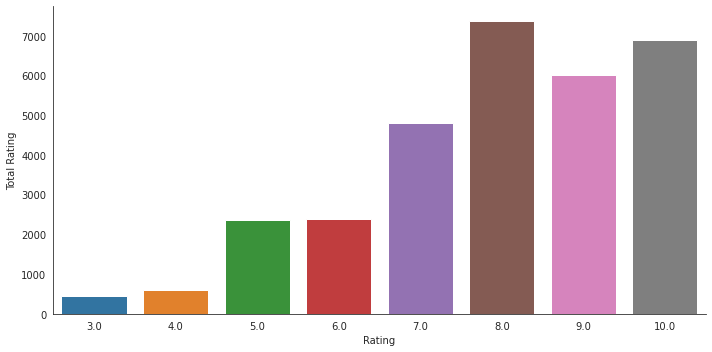

In [ ]:
import seaborn as sns

with sns.axes_style('white'):
    g = sns.catplot('Rating', data=books, aspect=2.0, kind='count')
    g.set_ylabels('Total Rating')

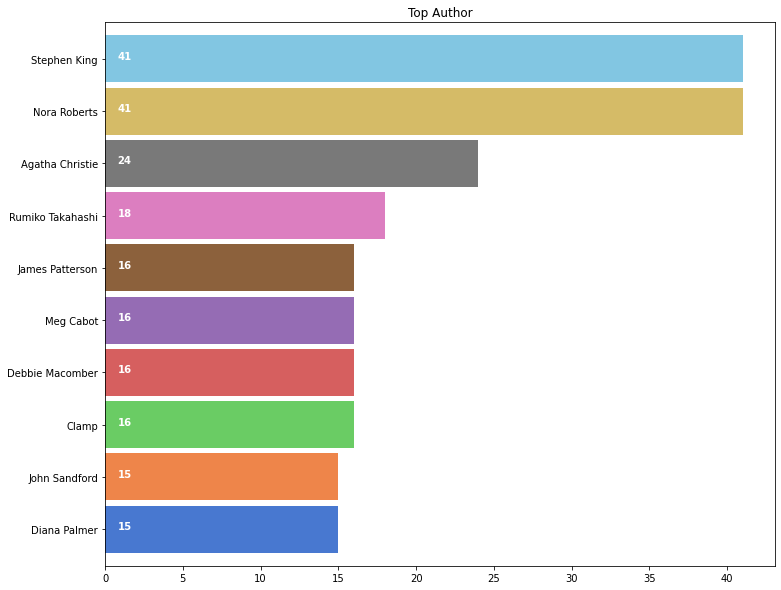

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,10))

ax=pd.Series(books_unique['Author']).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(books_unique['Author']).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Top Author')
plt.show()

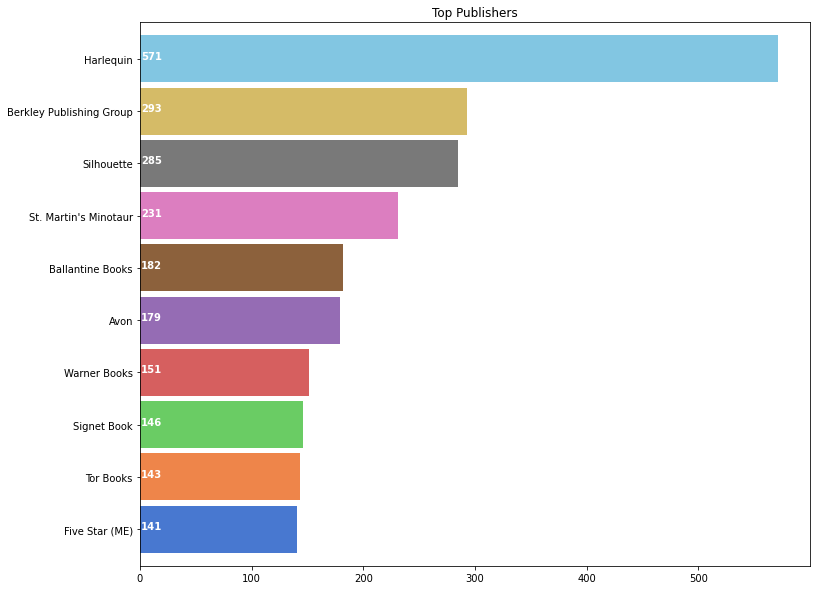

In [ ]:
plt.subplots(figsize=(12,10))

ax=pd.Series(books_unique['Publisher']).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(books_unique['Publisher']).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Top Publishers')
plt.show()

# Remove unused column

Drop kolom yang tidak digunakan pada pemodelan. Variabel books_unique akan digunakan pada tahapan implementasi KNN. Tujuan menggunakan variabel books_unique adalah untuk memperkecil jumlah data dan mempercepat proses pemodelan.

In [ ]:
books_unique=books_unique.drop('Age', axis=1)
books_unique=books_unique.drop('Location', axis=1)
books_unique

,userID,ISBN,Title,Author,PublicationYear,Publisher,Rating
780,278176.0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,9.0
3895,19.0,0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,7.0
6791,70.0,1414035004,The Adventures of Drew and Ellie: The Magical ...,Charles Noland,2003,1stBooks Library,10.0
6796,62966.0,0060938412,The Accidental Virgin,Valerie Frankel,2003,Avon Trade,7.0
6999,2375.0,0345465083,Seabiscuit,LAURA HILLENBRAND,2003,Ballantine Books,7.0
...,...,...,...,...,...,...,...
1032267,269557.0,1584857447,True Stories: Girls' Inspiring Stories of Cour...,Trula Magruder,2003,American Girl,10.0
1032271,269557.0,189369948X,Iron Insects Invade Indiana (American Chillers),Johnathan Rand,2003,Audio Craft Press,10.0
1032272,269557.0,1893699501,Missouri Madhouse (American Chillers),Johnathan Rand,2003,Audio Craft Press,9.0
1032273,269557.0,1893699560,Dangerous Dolls of Delaware (American Chillers),Johnathan Rand,2003,Audio Craft Pr Inc,10.0


# KNN Implementation

## Creating Pivot

Pada tahapan ini, dibuat pivot tabel untuk mengkonversi tabel menjadi matriks 2D dan mengisi missing value dengan nol karena akan dilakukan 
perhitungan distance antara vektor rating. 

Pivot table dibuat dengan menggunakan variabel ratings dengan atribut userID, ISBN, dan Rating. Adapun tujuan menggunakan variabel baru ini adalah untuk memperkecil data agar proses pembuatan pivot lebih ringan dan aman pada CPU.


In [ ]:
ratings = books[['userID', 'ISBN', 'Rating']]
ratings

,userID,ISBN,Rating
780,278176.0,0971880107,9.0
795,1435.0,0971880107,5.0
796,1486.0,0971880107,5.0
801,2411.0,0971880107,3.0
802,2766.0,0971880107,6.0
...,...,...,...
1032267,269557.0,1584857447,10.0
1032271,269557.0,189369948X,10.0
1032272,269557.0,1893699501,9.0
1032273,269557.0,1893699560,10.0


In [ ]:
rating_pivot = ratings.pivot(index='ISBN', columns='userID', values='Rating').fillna(0)

## Model Development

Import libraries yang akan digunakan pada tahap pemodelan. Operator digunakan untuk menentukan atribut/kolom/elemen (data tuple) yang akan digunakan untuk sorting. Correlation digunakan untuk mendapatkan jarak antaritem. MAE digunakan untuk evaluasi model.

In [ ]:
import operator

from scipy.spatial.distance import correlation
from sklearn.metrics import mean_absolute_error as mae

Proses ini bertujuan untuk mendapatkan jarak (distance) antara item yang dipilih dengan semua item pada dataset

In [ ]:
def get_distances(target_book):
    distances = []

    isbn = target_book['ISBN'].values[0]

    for index, book in books_unique.iterrows():
        if book['ISBN'] != isbn:
            dist = correlation(rating_pivot.loc[isbn].values, rating_pivot.loc[book['ISBN']].values)
            distances.append((book['ISBN'], book['Title'], dist))

    distances.sort(key=operator.itemgetter(2))
    return distances

### Finding the optimal K

Proses ini bertujuan untuk mendapatkan daftar rata-rata nilai MAE dengan melatih sebanyak 50 data secara acak dengan nilai K pada range yang ditentukan

In [ ]:
def get_error_rate(K_maks):
    result = []
    avg_error = 0

    for j in range(50):
        index = np.random.randint(len(books_unique))
        new_book = books_unique.iloc[index].to_frame().T
        distances = get_distances(new_book)

        total_rating = 0
        
        for i in range(K_maks):
            if j == 0:
                result.append([])

            neighbor = distances[i]
            current_book = books_unique[books_unique['ISBN'].str.contains(neighbor[0])].iloc[0]
            total_rating = total_rating + current_book[6]

            avg_rating = total_rating/(i+1)
            error = mae([new_book['Rating']], [avg_rating])

            result[i].append(error)

    for i in range(K_maks):
        result[i] = np.mean(result[i])

    return result

Proses ini bertujuan untuk mendapatkan nilai K optimal pada K = 11 - K = 173, dengan berdasarkan data latih sebanyak 50 data, dan nilai K optimal yang didapatkan adalah K = 15

In [ ]:
import matplotlib.pyplot as plt

rate = 173

error_rate = get_error_rate(rate)
error_rate_range = error_rate[10:]

K = error_rate.index(min(error_rate_range))+1

plt.figure(figsize=(10,6))
plt.plot(range(11,rate+1), error_rate_range, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-", min(error_rate_range), "at K =", K)

<img width="394" alt="image" src="https://user-images.githubusercontent.com/87566521/180286544-d332d288-2ccf-48dd-b7e1-71aab15bf6f8.png">

# Predictor

Proses ini bertujuan untuk mendapatkan Top-10 Recommendations dan memprediksi rating, serta nilai MAE sesuai dengan nilai K optimal.

In [ ]:
def predict(query):
    new_book = books_unique[books_unique['Title'].str.contains(query)].iloc[0].to_frame().T
    print('Selected Book: ', new_book.Title.values[0])
    
    total_rating = 0
    distances = get_distances(new_book)
    
    print('\nTop 10 Recommended Books: \n')

    for i in range(K):
        neighbor = distances[i]
        current_book = books_unique[books_unique['ISBN'].str.contains(neighbor[0])].iloc[0]
        total_rating = total_rating + current_book[6] 
        if i < 10:
            print(current_book[2]+" | Author: "+str(current_book[3])+" | Rating: "+str(current_book[6]))

    print('\n')
    avg_rating = total_rating/K
    print('The predicted rating for %s is: %f' %(new_book['Title']. values[0], avg_rating))
    print('The actual rating for %s is: %f' %(new_book['Title']. values[0], new_book['Rating']))

    error = mae([new_book['Rating']], [avg_rating])

    # display
    print("Mean absolute error: " + str(error))

In [ ]:
predict("Hard")

Selected Book:  Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)

Top 10 Recommended Books: 

One for the Money (A Stephanie Plum Novel) | Author: Janet Evanovich | Rating: 10.0
Baby Farm Animals (Little Golden Book Classic) | Author: GARTH WILLIAMS | Rating: 8.0
10th Grade : A Novel | Author: JOE WEISBERG | Rating: 9.0
The World's Fittest You: Four Weeks to Total Fitness | Author: Joe Decker | Rating: 10.0
The Odd Todd Handbook: Hard Times, Soft Couch | Author: Todd Rosenberg | Rating: 10.0
The Monsters of Morley Manor: A Madcap Adventure | Author: Bruce Coville | Rating: 8.0
Little People | Author: Tom Holt | Rating: 8.0
Beyond the Kama Sutra | Author: Eleanor McKenzie | Rating: 5.0
Lost Recipes : Meals to Share with Friends and Family | Author: MARION CUNNINGHAM | Rating: 10.0
By the Water's Edge | Author: Roger Lee Scott | Rating: 10.0


The predicted rating for Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel) is: 8.533333
The actual rating for Hard Eight : 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [ ]:
import matplotlib.pyplot as plt

rate = 179

error_rate = get_error_rate(rate)
error_rate_range = error_rate[10:]

K = error_rate.index(min(error_rate_range))+1

plt.figure(figsize=(10,6))
plt.plot(range(11,rate+1), error_rate_range, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-", min(error_rate_range), "at K =", K)

<img width="390" alt="image" src="https://user-images.githubusercontent.com/87566521/180286153-8d3f7f9f-0b2c-44eb-a127-cd7b8f737550.png">

In [ ]:
def predict(query):
    new_book = books_unique[books_unique['Title'].str.contains(query)].iloc[0].to_frame().T
    print('Selected Book: ', new_book.Title.values[0])
    
    total_rating = 0
    distances = get_distances(new_book)
    
    print('\nTop 10 Recommended Books: \n')

    for i in range(K):
        neighbor = distances[i]
        current_book = books_unique[books_unique['ISBN'].str.contains(neighbor[0])].iloc[0]
        total_rating = total_rating + current_book[6] 
        if i < 10:
            print(current_book[2]+" | Author: "+str(current_book[3])+" | Rating: "+str(current_book[6]))

    print('\n')
    avg_rating = total_rating/K
    print('The predicted rating for %s is: %f' %(new_book['Title']. values[0], avg_rating))
    print('The actual rating for %s is: %f' %(new_book['Title']. values[0], new_book['Rating']))

    error = mae([new_book['Rating']], [avg_rating])

    # display
    print("Mean absolute error: " + str(error))

In [ ]:
predict("Hard")

Selected Book:  Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)

Top 10 Recommended Books: 

One for the Money (A Stephanie Plum Novel) | Author: Janet Evanovich | Rating: 10.0
Baby Farm Animals (Little Golden Book Classic) | Author: GARTH WILLIAMS | Rating: 8.0
10th Grade : A Novel | Author: JOE WEISBERG | Rating: 9.0
The World's Fittest You: Four Weeks to Total Fitness | Author: Joe Decker | Rating: 10.0
The Odd Todd Handbook: Hard Times, Soft Couch | Author: Todd Rosenberg | Rating: 10.0
The Monsters of Morley Manor: A Madcap Adventure | Author: Bruce Coville | Rating: 8.0
Little People | Author: Tom Holt | Rating: 8.0
Beyond the Kama Sutra | Author: Eleanor McKenzie | Rating: 5.0
Lost Recipes : Meals to Share with Friends and Family | Author: MARION CUNNINGHAM | Rating: 10.0
By the Water's Edge | Author: Roger Lee Scott | Rating: 10.0


The predicted rating for Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel) is: 9.000000
The actual rating for Hard Eight : 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [ ]:
rate = 167

error_rate = get_error_rate(rate)
error_rate_range = error_rate[10:]

K = error_rate.index(min(error_rate_range))+1

plt.figure(figsize=(10,6))
plt.plot(range(11,rate+1), error_rate_range, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-", min(error_rate_range), "at K =", K)

<img width="393" alt="image" src="https://user-images.githubusercontent.com/87566521/180286358-f7bb9f87-41cc-4fcc-9d83-69f54872c43e.png">

In [ ]:
def predict(query):
    new_book = books_unique[books_unique['Title'].str.contains(query)].iloc[0].to_frame().T
    print('Selected Book: ', new_book.Title.values[0])
    
    total_rating = 0
    distances = get_distances(new_book)
    
    print('\nTop 10 Recommended Books: \n')

    for i in range(K):
        neighbor = distances[i]
        current_book = books_unique[books_unique['ISBN'].str.contains(neighbor[0])].iloc[0]
        total_rating = total_rating + current_book[6] 
        if i < 10:
            print(current_book[2]+" | Author: "+str(current_book[3])+" | Rating: "+str(current_book[6]))

    print('\n')
    avg_rating = total_rating/K
    print('The predicted rating for %s is: %f' %(new_book['Title']. values[0], avg_rating))
    print('The actual rating for %s is: %f' %(new_book['Title']. values[0], new_book['Rating']))

    error = mae([new_book['Rating']], [avg_rating])

    # display
    print("Mean absolute error: " + str(error))

In [ ]:
predict("Hard")

Selected Book:  Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)

Top 10 Recommended Books: 

One for the Money (A Stephanie Plum Novel) | Author: Janet Evanovich | Rating: 10.0
Baby Farm Animals (Little Golden Book Classic) | Author: GARTH WILLIAMS | Rating: 8.0
10th Grade : A Novel | Author: JOE WEISBERG | Rating: 9.0
The World's Fittest You: Four Weeks to Total Fitness | Author: Joe Decker | Rating: 10.0
The Odd Todd Handbook: Hard Times, Soft Couch | Author: Todd Rosenberg | Rating: 10.0
The Monsters of Morley Manor: A Madcap Adventure | Author: Bruce Coville | Rating: 8.0
Little People | Author: Tom Holt | Rating: 8.0
Beyond the Kama Sutra | Author: Eleanor McKenzie | Rating: 5.0
Lost Recipes : Meals to Share with Friends and Family | Author: MARION CUNNINGHAM | Rating: 10.0
By the Water's Edge | Author: Roger Lee Scott | Rating: 10.0


The predicted rating for Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel) is: 8.423077
The actual rating for Hard Eight : 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


# Penutup

Mean Absolute Error (MAE) mengukur besarnya kesalahan pada prediksi rating terhadap data. Semakin rendah nilai MAE (Mean Absolute Error) maka semakin baik dan akurat model yang dibuat.

Berikut rumusnya :

![image](https://user-images.githubusercontent.com/87566521/139152819-30500f63-40a3-40ed-86fd-a62e517adbb4.png)

Hasil implementasi dari model yang telah dibukan akan digunakan untuk memberikan rekomendasi buku serta memprediksi rating yang akan diberikan oleh pengguna. Berikut adalah hasil implementasi Algoritma K-Nearest Neighbors pada sistem rekomendasi buku dengan judul buku “Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)”:


#### Nilai K dan Waktu Eksekusi
<img width="392" alt="image" src="https://user-images.githubusercontent.com/87566521/180284711-5a4698fb-6f28-4a27-a300-ffbc4f655e81.png">

#### Hasil Rekomendasi
<img width="545" alt="image" src="https://user-images.githubusercontent.com/87566521/180285055-d299ea27-d88b-466b-b045-30bd1401caf8.png">

#### Hasil Evaluasi MAE
<img width="432" alt="image" src="https://user-images.githubusercontent.com/87566521/180285373-65de6c08-1c37-4179-bc5d-ba8788ca4fab.png">